## Video Action Recognition I3D
- paper : (2017) Quo Vadis, Action Recognition? A New Model and the Kinetics Dataset


## Action Classification Dataset 종류
- 기존에는 UCF101, HMDB51 데이터셋이 존재
- HMDB-51
    - Action class : 51개
    - 데이터 개수 : 6849개 / Youtube
    - class 당 clip 개수 : 최소 101개
    - https://serre-lab.clps.brown.edu/resource/hmdb-a-large-human-motion-database/ 

- UCF101 
    - Action class : 101개
    - 데이터 개수 : 13,320개 / Youtube
    - class 당 clip 갯수 : 최소 100개 ~ 180개
    - https://www.crcv.ucf.edu/data/UCF101.php 

- Kinetics 데이터셋
    - Version : 400, 600, 700
    - Action Class : 400개, 600개, 700개
    - class 당 clip 개수 : 최소 250~1000개
    - 데이터 갯수 30만 ~ 60만개
    - 특징
        - Deepmind사에서 만든 데이터셋, youtube url로 데이터셋 배포
        - 클립당 10초 가량으로 이루어져 있으며 single class label이 달려있음
        - 각 클립의 labeling은 사람이 했으며, 유튜브에 있는 유니크한 클립
        - https://deepmind.com/research/open-source/kinetics

<hr>

## Introduction & Abstract
- 새로운 Action Classification 데이터셋인 Kinetics을 만듬
- Video에서의 Transfer-learning이 의미가 있을가에 대한 실험 (ImageNet과 Kinetics Pretrained 후 UCF, HMDB에 실험)
- ImageNet은 Inflating 방법을 이용해 pre-trained 모델을 이용
- RGB Frame 학습 모델과, Optical-Flow(지칭 Flow) 학습 모델을 분리 하여 학습, 각각의 Predictions Average함.
- Kinetics을 학습한 모델이 HMDB나 UCF에서도 좋은 성능을 보이며 Kinetics 데이터의 유효성을 증명

<hr>




## Related Works

![i3d_related_work](img/i3d_related_work.png)

### The old 1. ConvNet + LSTM
- sequntal한 video 데이터셋의 특성을 고려, RNN계열 LSTM 네트워크 추가
- CNN을 이용해 프레임마다 feature를 추출 및 추출된 Feature Vector를 Decoder인 LSTM에 넣어주는 구조
- Paper
    - (2014) LRCN - Long-term Recurrent Convolutional Networks for Visual Recognition and Description

- 문제점
    - temporal structure를 무시하는 구조
    - low level motion 캡처 힘듬
    - 여러 frame을 시간축으로 backpropagation하면서 unrolling 하기 때문에 학습비용 cost 가 높음
    
### The old 2 : 3D ConvNets
- 3D Conv를 이용해 spatiotemporal 정보를 잘 취득
- 학습해야할 파라미터가 많아 학습이 힘듬
- Paper
    - (2014) C3D - Learning Spatiotemporal Features with 3D Convolutional Networks
    - (2016) LTC - Long-term Temporal Convolutionsfor Action Recognition)

### The old 3 : Two-Stream Net
- 입력으로 RGB 프레임과 optical flow 프레임을 같이 넣어주는 구조
- RGB 만을 넣어주는 경우보다 거의 모든 경우 더 높은 성능을 보임
- Paper
    - (2014) Two Stream - Two-Stream Convolutional Networks for Action Recognition in Videos

<hr>



## Two-Stream Inflated 3D ConvNet
- ImageNet을 학습한 2D ConvNet으로 문제 해결하고자 함

### Inflating 방법
- N x N filters를 N x N x N 필터로 바꾸는 방법을 지칭
- 해당 가중치를 복제하여 필터의 dimension을 늘려준 뒤, weight를 1/N (갯수만큼)으로 나눔
    
![i3d_inflating](img/i3d_inflating.png)

### Two 3D Streams
- optical flow 정보를 넣어줌으로써 motion 정보에 대해 더 잘 예측 (Optical Flow는 TV-L1 Algorithm을 사용)
- 두개의 I3D 모델을 각각 입력을 RGB, optical flow를 넣어주어 학습 진행
- **두 Prediction의 평균값을 취해 최종 Prediction**

![i3d_model](img/i3d_model.png)

<hr>



## Training
- ImageNet Pretrained Inception-v1 사용 가중치 Inflating
- 모든 Conv layer에 BN, ReLU 사용
- SGD + Momentum 0.9 사용
- Augmentation
    - 입력 영상 size : 256pixel, resize -> 224pixel, cropping
    - 좌우 flip
- 입력영상은 25fps, 총 길이는 64frame

<hr>

## 실험결과 (Results)

#### Case 1. Two Stream
- 일반적으로 RGB만 넣어준 것보다, RGB, FLOW를 넣어준 것이 더 좋은 결과를 보임
- 실험용으로 진행 결과
![i3d_result2](img/i3d_result2.png)

<hr>


#### Case 2.ImageNet Pretrained 
- 처음부터 학습한 모델보다 , ImageNet pretrained를 사용한 모델의 성능이 더 잘나옴.

![i3d_result1](img/i3d_result1.png)

<hr>

#### Case 3. Kinetics + ImageNet
- UCF-101, HMDB-51에 대한 최종 실험 결과

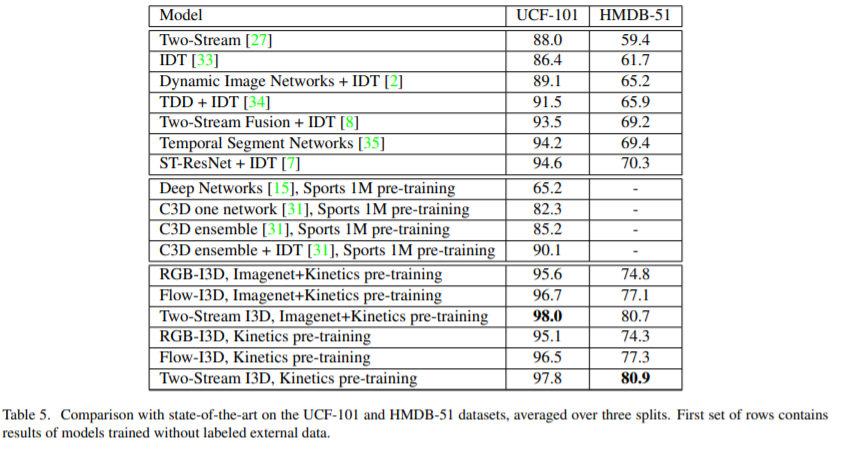

<hr>

## 참고문헌
- https://chacha95.github.io/2019-07-04-VideoUnderstanding3/